In [142]:
#https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_05_2_kfold.ipynb
#https://youtu.be/maiQf8ray_s
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


import seaborn as sns
sns.set(style="darkgrid")

import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential


In [143]:
#Viewing dataset
data = pd.read_csv('SinglePointData.csv')
data

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [144]:
#Scaling the columms 

cols_to_scale = ['Standard Error','Median','Mode', 'Standard Deviation', 'Sample Variance','Kurtosis', 'Skewness', 'Range', 'Minimum', 'Maximum', 'Sum', 'Count']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.015135,0.836431,0.859060,0.015135,0.000327,0.013297,0.527690,0.017857,0.919298,0.59,0.933748,1.0,Good
1,0.012991,0.858736,0.872483,0.012991,0.000253,0.026231,0.567926,0.014286,0.933333,0.62,0.943195,1.0,Good
2,0.009277,0.881041,0.892617,0.009277,0.000147,0.026097,0.519864,0.010714,0.943860,0.64,0.951133,1.0,Good
3,0.009541,0.895911,0.906040,0.009541,0.000153,0.015162,0.546963,0.010714,0.950877,0.66,0.958468,1.0,Good
4,0.008918,0.918216,0.926174,0.008918,0.000138,0.031577,0.516852,0.014286,0.957895,0.69,0.965259,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.135093,0.539033,0.617450,0.135093,0.019020,0.047641,0.466669,0.189286,0.666667,0.35,0.807250,1.0,Crater wear
296,0.143150,0.535316,0.597315,0.143150,0.021301,0.036199,0.478971,0.185714,0.670175,0.35,0.807009,1.0,Crater wear
297,0.143839,0.475836,0.523490,0.143839,0.021502,0.035222,0.531569,0.196429,0.649123,0.32,0.787782,1.0,Crater wear
298,0.251861,0.684015,0.724832,0.251861,0.064676,0.034532,0.410731,0.260714,0.642105,0.48,0.836890,1.0,Crater wear


In [145]:
#One hot encoding for the independent variable "Condition"
labels = pd.get_dummies(data.Condition, prefix='Condition')
labels

,Condition_Crater wear,Condition_Flank Wear,Condition_Good,Condition_Nose Wear,Condition_Notch wear,Condition_Tool breakage
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
295,1,0,0,0,0,0
296,1,0,0,0,0,0
297,1,0,0,0,0,0
298,1,0,0,0,0,0


In [129]:
#Creating a different dataset for the "Condition" column
y = data.Condition
#Dropping the "Condition" Column from the original dataset
X = data.drop('Condition', axis=1)

In [130]:
y = labels.values
y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [131]:
X_columns = data.columns.drop('Condition')
X = data[X_columns].values
X

array([[0.01513515, 0.83643123, 0.8590604 , ..., 0.59      , 0.93374785,
        1.        ],
       [0.01299065, 0.85873606, 0.87248322, ..., 0.62      , 0.94319519,
        1.        ],
       [0.00927737, 0.88104089, 0.89261745, ..., 0.64      , 0.95113338,
        1.        ],
       ...,
       [0.14383932, 0.47583643, 0.52348993, ..., 0.32      , 0.78778184,
        1.        ],
       [0.25186051, 0.68401487, 0.72483221, ..., 0.48      , 0.83688992,
        1.        ],
       [0.12112628, 0.7063197 , 0.73825503, ..., 0.49      , 0.        ,
        0.        ]])

In [132]:
# Use for StratifiedKFold classification
kf = StratifiedKFold(10, shuffle=True, random_state=42)

In [133]:
#oos_y = []
#oos_pred = []
fold = 0

In [134]:
# Must specify y StratifiedKFold for
for train, test in kf.split(X,data['Condition']):  
   
    fold+=1
    print(f"Fold #{fold}")
        
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    
    #https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
    #Creating/defining the Neural Network Model 
    input_layer = Input(shape=(X.shape[1],))
    dense_layer_1 = Dense(10, activation='selu')(input_layer)
    dense_layer_2 = Dense(10, activation='selu')(dense_layer_1)
    dense_layer_3 = Dense(10, activation='selu')(dense_layer_2)
    dense_layer_4 = Dense(10, activation='selu')(dense_layer_3)
    dense_layer_5 = Dense(7, activation='selu')(dense_layer_4)
    dense_layer_6 = Dense(7, activation='selu')(dense_layer_5)
    dense_layer_7 = Dense(7, activation='selu')(dense_layer_6)
    output = Dense(y.shape[1], activation='softmax')(dense_layer_7)

    #Compiling the model based on above mentioned attributes
    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['acc'])
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test,y_test))
    #history = model.fit(X_train, y_train, epochs=10, verbose=1)
    
    #model = Sequential()
    #model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    #model.add(Dense(25, activation='relu')) # Hidden 2
    #model.add(Dense(y.shape[1],activation='softmax')) # Output
    #model.compile(loss='categorical_crossentropy', optimizer='adam')

    #model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,\epochs=500)
    
    ##pred = model.predict(X_test)
    
    ##oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    ##pred = np.argmax(pred,axis=1) 
    ##oos_pred.append(pred)  

    # Measure this fold's accuracy
    ##y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    ##score = metrics.accuracy_score(y_compare, pred)
    ##print(f"Fold score (accuracy): {score}")

Fold #1
Epoch 1/300
9/9 [==============================] - 1s 69ms/step - loss: 2.1530 - acc: 0.1630 - val_loss: 1.9386 - val_acc: 0.1667
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 1.8585 - acc: 0.1593 - val_loss: 1.7579 - val_acc: 0.1667
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 1.7779 - acc: 0.1481 - val_loss: 1.7585 - val_acc: 0.2000
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 1.7698 - acc: 0.1407 - val_loss: 1.7188 - val_acc: 0.2000
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 1.7505 - acc: 0.3222 - val_loss: 1.6891 - val_acc: 0.4333
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 1.7268 - acc: 0.3296 - val_loss: 1.6573 - val_acc: 0.4333
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 1.6996 - acc: 0.3815 - val_loss: 1.6293 - val_acc: 0.4667
Epoch 8/300
9/9 [==============================] - 0s 7ms/step - loss: 1.6715 - acc: 0.4

Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7083 - acc: 0.7074 - val_loss: 0.8870 - val_acc: 0.7667
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7083 - acc: 0.7111 - val_loss: 0.8865 - val_acc: 0.7000
Epoch 66/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7045 - acc: 0.6815 - val_loss: 0.8873 - val_acc: 0.6667
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6989 - acc: 0.6852 - val_loss: 0.8855 - val_acc: 0.7000
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6926 - acc: 0.7074 - val_loss: 0.8874 - val_acc: 0.7000
Epoch 69/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6854 - acc: 0.6963 - val_loss: 0.8862 - val_acc: 0.7000
Epoch 70/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6799 - acc: 0.7185 - val_loss: 0.8880 - val_acc: 0.6667
Epoch 71/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6824 - acc: 0.70

Epoch 127/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5490 - acc: 0.7593 - val_loss: 0.9585 - val_acc: 0.7667
Epoch 128/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5476 - acc: 0.7593 - val_loss: 0.9622 - val_acc: 0.7667
Epoch 129/300
9/9 [==============================] - 0s 13ms/step - loss: 0.5470 - acc: 0.7556 - val_loss: 0.9659 - val_acc: 0.7667
Epoch 130/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5460 - acc: 0.7519 - val_loss: 0.9771 - val_acc: 0.7333
Epoch 131/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5477 - acc: 0.7593 - val_loss: 0.9723 - val_acc: 0.7667
Epoch 132/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5418 - acc: 0.7593 - val_loss: 0.9783 - val_acc: 0.7667
Epoch 133/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5402 - acc: 0.7556 - val_loss: 0.9726 - val_acc: 0.7667
Epoch 134/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5463 -

9/9 [==============================] - 0s 5ms/step - loss: 0.4501 - acc: 0.8370 - val_loss: 0.9000 - val_acc: 0.8667
Epoch 190/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4452 - acc: 0.8333 - val_loss: 0.8967 - val_acc: 0.8333
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4500 - acc: 0.8037 - val_loss: 0.9172 - val_acc: 0.7667
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4489 - acc: 0.8074 - val_loss: 0.9794 - val_acc: 0.7667
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4665 - acc: 0.8000 - val_loss: 0.8963 - val_acc: 0.9000
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4397 - acc: 0.8259 - val_loss: 0.8874 - val_acc: 0.8667
Epoch 195/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4389 - acc: 0.8222 - val_loss: 0.9169 - val_acc: 0.8333
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4353 - acc: 0.8296 - v

9/9 [==============================] - 0s 5ms/step - loss: 0.3954 - acc: 0.8444 - val_loss: 0.8259 - val_acc: 0.9000
Epoch 252/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3923 - acc: 0.8481 - val_loss: 0.8276 - val_acc: 0.9000
Epoch 253/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3977 - acc: 0.8333 - val_loss: 0.8337 - val_acc: 0.8667
Epoch 254/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3972 - acc: 0.8370 - val_loss: 0.8431 - val_acc: 0.8667
Epoch 255/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4202 - acc: 0.8185 - val_loss: 0.8578 - val_acc: 0.8667
Epoch 256/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.8444 - val_loss: 0.8384 - val_acc: 0.8667
Epoch 257/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3982 - acc: 0.8333 - val_loss: 0.8950 - val_acc: 0.8333
Epoch 258/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4026 - acc: 0.8185 - v

9/9 [==============================] - 0s 5ms/step - loss: 1.7411 - acc: 0.2074 - val_loss: 1.7187 - val_acc: 0.2333
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 1.7225 - acc: 0.2074 - val_loss: 1.7114 - val_acc: 0.3000
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 1.7110 - acc: 0.3444 - val_loss: 1.6982 - val_acc: 0.3667
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 1.6963 - acc: 0.3778 - val_loss: 1.6833 - val_acc: 0.3333
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 1.6780 - acc: 0.3852 - val_loss: 1.6682 - val_acc: 0.3333
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 1.6582 - acc: 0.4704 - val_loss: 1.6469 - val_acc: 0.4333
Epoch 19/300
9/9 [==============================] - 0s 8ms/step - loss: 1.6301 - acc: 0.5222 - val_loss: 1.6194 - val_acc: 0.4667
Epoch 20/300
9/9 [==============================] - 0s 8ms/step - loss: 1.5974 - acc: 0.5111 - val_loss

9/9 [==============================] - 0s 10ms/step - loss: 0.7200 - acc: 0.7222 - val_loss: 1.0085 - val_acc: 0.7000
Epoch 77/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7154 - acc: 0.6852 - val_loss: 1.0017 - val_acc: 0.7000
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7077 - acc: 0.7111 - val_loss: 0.9975 - val_acc: 0.7333
Epoch 79/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7062 - acc: 0.7185 - val_loss: 0.9980 - val_acc: 0.7333
Epoch 80/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6987 - acc: 0.7074 - val_loss: 0.9796 - val_acc: 0.7333
Epoch 81/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6935 - acc: 0.7333 - val_loss: 0.9791 - val_acc: 0.7333
Epoch 82/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6881 - acc: 0.7185 - val_loss: 0.9693 - val_acc: 0.7333
Epoch 83/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6862 - acc: 0.7407 - val_los

Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4806 - acc: 0.8481 - val_loss: 0.7803 - val_acc: 0.8000
Epoch 140/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4845 - acc: 0.8037 - val_loss: 0.7526 - val_acc: 0.8667
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4997 - acc: 0.8222 - val_loss: 0.7940 - val_acc: 0.7667
Epoch 142/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4757 - acc: 0.8111 - val_loss: 0.7732 - val_acc: 0.8333
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4817 - acc: 0.8370 - val_loss: 0.7824 - val_acc: 0.8333
Epoch 144/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4632 - acc: 0.8704 - val_loss: 0.7525 - val_acc: 0.8333
Epoch 145/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4641 - acc: 0.8519 - val_loss: 0.7796 - val_acc: 0.8000
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4693 - a

9/9 [==============================] - 0s 8ms/step - loss: 0.3676 - acc: 0.8667 - val_loss: 0.6706 - val_acc: 0.8333
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3684 - acc: 0.8444 - val_loss: 0.6532 - val_acc: 0.8667
Epoch 203/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3567 - acc: 0.8556 - val_loss: 0.6600 - val_acc: 0.8333
Epoch 204/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3718 - acc: 0.8444 - val_loss: 0.6889 - val_acc: 0.8333
Epoch 205/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3483 - acc: 0.8852 - val_loss: 0.6715 - val_acc: 0.8333
Epoch 206/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3525 - acc: 0.8778 - val_loss: 0.6589 - val_acc: 0.8000
Epoch 207/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3451 - acc: 0.8741 - val_loss: 0.6595 - val_acc: 0.8333
Epoch 208/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3467 - acc: 0.8815 - v

9/9 [==============================] - 0s 8ms/step - loss: 0.2851 - acc: 0.8963 - val_loss: 0.5879 - val_acc: 0.8000
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2985 - acc: 0.8815 - val_loss: 0.6119 - val_acc: 0.8333
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2942 - acc: 0.8889 - val_loss: 0.6465 - val_acc: 0.8333
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3215 - acc: 0.8593 - val_loss: 0.6116 - val_acc: 0.8333
Epoch 267/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3000 - acc: 0.8778 - val_loss: 0.5822 - val_acc: 0.8333
Epoch 268/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2837 - acc: 0.9000 - val_loss: 0.6072 - val_acc: 0.8333
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2762 - acc: 0.9037 - val_loss: 0.6213 - val_acc: 0.8000
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2779 - acc: 0.9111 - v

Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0529 - acc: 0.4926 - val_loss: 0.9877 - val_acc: 0.6000
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0368 - acc: 0.4926 - val_loss: 0.9534 - val_acc: 0.5000
Epoch 28/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0190 - acc: 0.5148 - val_loss: 0.9512 - val_acc: 0.6000
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9928 - acc: 0.5481 - val_loss: 0.9101 - val_acc: 0.5667
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9735 - acc: 0.5630 - val_loss: 0.8922 - val_acc: 0.6000
Epoch 31/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9586 - acc: 0.5815 - val_loss: 0.8756 - val_acc: 0.5667
Epoch 32/300
9/9 [==============================] - 0s 7ms/step - loss: 0.9431 - acc: 0.5889 - val_loss: 0.8484 - val_acc: 0.5667
Epoch 33/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9301 - acc: 0.55

9/9 [==============================] - 0s 7ms/step - loss: 0.6415 - acc: 0.7259 - val_loss: 0.5549 - val_acc: 0.7667
Epoch 90/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6443 - acc: 0.7333 - val_loss: 0.5608 - val_acc: 0.8000
Epoch 91/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6383 - acc: 0.7444 - val_loss: 0.5572 - val_acc: 0.8000
Epoch 92/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6383 - acc: 0.7519 - val_loss: 0.5454 - val_acc: 0.7667
Epoch 93/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6314 - acc: 0.6889 - val_loss: 0.5558 - val_acc: 0.8000
Epoch 94/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6269 - acc: 0.7370 - val_loss: 0.5380 - val_acc: 0.8000
Epoch 95/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6328 - acc: 0.7000 - val_loss: 0.5555 - val_acc: 0.7667
Epoch 96/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6258 - acc: 0.7296 - val_loss

Epoch 152/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4849 - acc: 0.7778 - val_loss: 0.3867 - val_acc: 0.8667
Epoch 153/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4831 - acc: 0.7704 - val_loss: 0.3870 - val_acc: 0.8667
Epoch 154/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4881 - acc: 0.7704 - val_loss: 0.3780 - val_acc: 0.8667
Epoch 155/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4882 - acc: 0.7852 - val_loss: 0.3874 - val_acc: 0.8667
Epoch 156/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4784 - acc: 0.7852 - val_loss: 0.3803 - val_acc: 0.8667
Epoch 157/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4778 - acc: 0.7852 - val_loss: 0.3734 - val_acc: 0.8667
Epoch 158/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4818 - acc: 0.7630 - val_loss: 0.3804 - val_acc: 0.8667
Epoch 159/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5074 - a

9/9 [==============================] - 0s 7ms/step - loss: 0.4125 - acc: 0.8111 - val_loss: 0.3300 - val_acc: 0.9000
Epoch 215/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4159 - acc: 0.8000 - val_loss: 0.3376 - val_acc: 0.8333
Epoch 216/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4143 - acc: 0.8259 - val_loss: 0.3367 - val_acc: 0.9000
Epoch 217/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4074 - acc: 0.8148 - val_loss: 0.3297 - val_acc: 0.8667
Epoch 218/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4127 - acc: 0.8000 - val_loss: 0.3301 - val_acc: 0.9000
Epoch 219/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4060 - acc: 0.8074 - val_loss: 0.3182 - val_acc: 0.8667
Epoch 220/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4045 - acc: 0.8148 - val_loss: 0.3255 - val_acc: 0.9000
Epoch 221/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4062 - acc: 0.8074 - v

9/9 [==============================] - 0s 8ms/step - loss: 0.3637 - acc: 0.8185 - val_loss: 0.2988 - val_acc: 0.9000
Epoch 277/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3670 - acc: 0.8148 - val_loss: 0.3025 - val_acc: 0.8667
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3835 - acc: 0.8185 - val_loss: 0.3202 - val_acc: 0.9000
Epoch 279/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3710 - acc: 0.8259 - val_loss: 0.3001 - val_acc: 0.9000
Epoch 280/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3743 - acc: 0.8222 - val_loss: 0.2905 - val_acc: 0.9333
Epoch 281/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3741 - acc: 0.8111 - val_loss: 0.2927 - val_acc: 0.9000
Epoch 282/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3694 - acc: 0.8259 - val_loss: 0.2981 - val_acc: 0.9333
Epoch 283/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3723 - acc: 0.8259 - v

Epoch 39/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7925 - acc: 0.6889 - val_loss: 0.9046 - val_acc: 0.5667
Epoch 40/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7850 - acc: 0.6667 - val_loss: 0.9002 - val_acc: 0.6000
Epoch 41/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7800 - acc: 0.6444 - val_loss: 0.9111 - val_acc: 0.6000
Epoch 42/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7725 - acc: 0.6444 - val_loss: 0.8991 - val_acc: 0.6000
Epoch 43/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7681 - acc: 0.6667 - val_loss: 0.8917 - val_acc: 0.5667
Epoch 44/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7586 - acc: 0.6963 - val_loss: 0.8798 - val_acc: 0.6333
Epoch 45/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7486 - acc: 0.6593 - val_loss: 0.8901 - val_acc: 0.5333
Epoch 46/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7425 - acc: 0.64

9/9 [==============================] - 0s 5ms/step - loss: 0.5496 - acc: 0.7741 - val_loss: 0.8088 - val_acc: 0.6667
Epoch 103/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5497 - acc: 0.7741 - val_loss: 0.8074 - val_acc: 0.6667
Epoch 104/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5516 - acc: 0.7593 - val_loss: 0.8372 - val_acc: 0.6333
Epoch 105/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5463 - acc: 0.7630 - val_loss: 0.8108 - val_acc: 0.6667
Epoch 106/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5445 - acc: 0.7741 - val_loss: 0.8124 - val_acc: 0.6667
Epoch 107/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5427 - acc: 0.7667 - val_loss: 0.8083 - val_acc: 0.6667
Epoch 108/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5409 - acc: 0.7741 - val_loss: 0.8177 - val_acc: 0.6667
Epoch 109/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5399 - acc: 0.7778 - v

9/9 [==============================] - 0s 6ms/step - loss: 0.4832 - acc: 0.7704 - val_loss: 0.8455 - val_acc: 0.6667
Epoch 165/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4823 - acc: 0.7741 - val_loss: 0.8508 - val_acc: 0.6667
Epoch 166/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4819 - acc: 0.7704 - val_loss: 0.8516 - val_acc: 0.6667
Epoch 167/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4798 - acc: 0.7704 - val_loss: 0.8416 - val_acc: 0.6667
Epoch 168/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4803 - acc: 0.7741 - val_loss: 0.8435 - val_acc: 0.6333
Epoch 169/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4764 - acc: 0.7778 - val_loss: 0.8363 - val_acc: 0.6667
Epoch 170/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4790 - acc: 0.7778 - val_loss: 0.8520 - val_acc: 0.6667
Epoch 171/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4759 - acc: 0.7778 - 

9/9 [==============================] - 0s 8ms/step - loss: 0.4217 - acc: 0.8074 - val_loss: 0.7610 - val_acc: 0.7000
Epoch 227/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4229 - acc: 0.8074 - val_loss: 0.7340 - val_acc: 0.7333
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4101 - acc: 0.8259 - val_loss: 0.7598 - val_acc: 0.7000
Epoch 229/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4107 - acc: 0.8148 - val_loss: 0.7456 - val_acc: 0.7000
Epoch 230/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4077 - acc: 0.8111 - val_loss: 0.7269 - val_acc: 0.7333
Epoch 231/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4085 - acc: 0.8185 - val_loss: 0.7277 - val_acc: 0.7333
Epoch 232/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4034 - acc: 0.8185 - val_loss: 0.7278 - val_acc: 0.7667
Epoch 233/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4022 - acc: 0.8222 - v

9/9 [==============================] - 0s 9ms/step - loss: 0.3292 - acc: 0.9074 - val_loss: 0.5158 - val_acc: 0.8667
Epoch 289/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3342 - acc: 0.9000 - val_loss: 0.5523 - val_acc: 0.8333
Epoch 290/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3232 - acc: 0.8852 - val_loss: 0.5117 - val_acc: 0.8333
Epoch 291/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3338 - acc: 0.9000 - val_loss: 0.5367 - val_acc: 0.8000
Epoch 292/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3200 - acc: 0.8852 - val_loss: 0.5062 - val_acc: 0.8667
Epoch 293/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3275 - acc: 0.8852 - val_loss: 0.5302 - val_acc: 0.8667
Epoch 294/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3281 - acc: 0.9148 - val_loss: 0.4930 - val_acc: 0.8667
Epoch 295/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3213 - acc: 0.9296 

9/9 [==============================] - 0s 5ms/step - loss: 0.7552 - acc: 0.7222 - val_loss: 0.7154 - val_acc: 0.7000
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7490 - acc: 0.7407 - val_loss: 0.7114 - val_acc: 0.7000
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7444 - acc: 0.7444 - val_loss: 0.7027 - val_acc: 0.7000
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7373 - acc: 0.7407 - val_loss: 0.6952 - val_acc: 0.7000
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7369 - acc: 0.7444 - val_loss: 0.6885 - val_acc: 0.6667
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7282 - acc: 0.7407 - val_loss: 0.6963 - val_acc: 0.6333
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7359 - acc: 0.7000 - val_loss: 0.6795 - val_acc: 0.6667
Epoch 58/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7152 - acc: 0.7556 - val_loss

9/9 [==============================] - 0s 5ms/step - loss: 0.5593 - acc: 0.7630 - val_loss: 0.5597 - val_acc: 0.7000
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5602 - acc: 0.7370 - val_loss: 0.5663 - val_acc: 0.7000
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5617 - acc: 0.7556 - val_loss: 0.5588 - val_acc: 0.7000
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5598 - acc: 0.7593 - val_loss: 0.5562 - val_acc: 0.7000
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5527 - acc: 0.7630 - val_loss: 0.5598 - val_acc: 0.7000
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5496 - acc: 0.7667 - val_loss: 0.5550 - val_acc: 0.7000
Epoch 120/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5475 - acc: 0.7667 - val_loss: 0.5567 - val_acc: 0.7000
Epoch 121/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5473 - acc: 0.7593 - v

9/9 [==============================] - 0s 6ms/step - loss: 0.4875 - acc: 0.7778 - val_loss: 0.5292 - val_acc: 0.7000
Epoch 177/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4901 - acc: 0.7741 - val_loss: 0.5266 - val_acc: 0.7000
Epoch 178/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4918 - acc: 0.7815 - val_loss: 0.5264 - val_acc: 0.7000
Epoch 179/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4870 - acc: 0.7778 - val_loss: 0.5207 - val_acc: 0.7000
Epoch 180/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4934 - acc: 0.7667 - val_loss: 0.5249 - val_acc: 0.7000
Epoch 181/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4880 - acc: 0.7741 - val_loss: 0.5219 - val_acc: 0.7000
Epoch 182/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5001 - acc: 0.7519 - val_loss: 0.5360 - val_acc: 0.7000
Epoch 183/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4882 - acc: 0.7741 - v

9/9 [==============================] - 0s 12ms/step - loss: 0.4509 - acc: 0.7963 - val_loss: 0.4997 - val_acc: 0.7000
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4444 - acc: 0.7889 - val_loss: 0.5010 - val_acc: 0.7000
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4432 - acc: 0.7926 - val_loss: 0.5070 - val_acc: 0.7000
Epoch 241/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4405 - acc: 0.7926 - val_loss: 0.4937 - val_acc: 0.7000
Epoch 242/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4415 - acc: 0.7963 - val_loss: 0.4970 - val_acc: 0.8000
Epoch 243/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4484 - acc: 0.7926 - val_loss: 0.5058 - val_acc: 0.7000
Epoch 244/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4491 - acc: 0.7963 - val_loss: 0.5041 - val_acc: 0.7000
Epoch 245/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4404 - acc: 0.7889 - 

9/9 [==============================] - 0s 9ms/step - loss: 0.3746 - acc: 0.8963 - val_loss: 0.4462 - val_acc: 0.8000
Fold #6
Epoch 1/300
9/9 [==============================] - 1s 63ms/step - loss: 1.9257 - acc: 0.1852 - val_loss: 1.8570 - val_acc: 0.1667
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 1.8368 - acc: 0.1741 - val_loss: 1.8322 - val_acc: 0.1667
Epoch 3/300
9/9 [==============================] - 0s 8ms/step - loss: 1.8126 - acc: 0.1704 - val_loss: 1.8062 - val_acc: 0.1667
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 1.7888 - acc: 0.1778 - val_loss: 1.7874 - val_acc: 0.2000
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 1.7725 - acc: 0.2000 - val_loss: 1.7697 - val_acc: 0.2000
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 1.7540 - acc: 0.2074 - val_loss: 1.7517 - val_acc: 0.2000
Epoch 7/300
9/9 [==============================] - 0s 9ms/step - loss: 1.7342 - acc: 0.3037 - val_lo

Epoch 63/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6379 - acc: 0.7407 - val_loss: 0.6625 - val_acc: 0.7667
Epoch 64/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6255 - acc: 0.7852 - val_loss: 0.6849 - val_acc: 0.7000
Epoch 65/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6134 - acc: 0.7667 - val_loss: 0.6530 - val_acc: 0.8000
Epoch 66/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6178 - acc: 0.7593 - val_loss: 0.6661 - val_acc: 0.7667
Epoch 67/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6081 - acc: 0.7630 - val_loss: 0.6413 - val_acc: 0.7667
Epoch 68/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6108 - acc: 0.7778 - val_loss: 0.6352 - val_acc: 0.8000
Epoch 69/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6107 - acc: 0.7630 - val_loss: 0.6504 - val_acc: 0.7667
Epoch 70/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5945 - acc: 0.76

Epoch 126/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4284 - acc: 0.8259 - val_loss: 0.5107 - val_acc: 0.8667
Epoch 127/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3972 - acc: 0.8778 - val_loss: 0.5178 - val_acc: 0.8333
Epoch 128/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4169 - acc: 0.8556 - val_loss: 0.5209 - val_acc: 0.8333
Epoch 129/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4122 - acc: 0.8556 - val_loss: 0.5824 - val_acc: 0.7667
Epoch 130/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4585 - acc: 0.8185 - val_loss: 0.5647 - val_acc: 0.8000
Epoch 131/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4277 - acc: 0.8370 - val_loss: 0.5141 - val_acc: 0.8333
Epoch 132/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3930 - acc: 0.8593 - val_loss: 0.5593 - val_acc: 0.7667
Epoch 133/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4162 - a

9/9 [==============================] - 0s 6ms/step - loss: 0.3276 - acc: 0.8815 - val_loss: 0.5569 - val_acc: 0.8333
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3270 - acc: 0.8926 - val_loss: 0.5498 - val_acc: 0.8333
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3335 - acc: 0.8852 - val_loss: 0.5480 - val_acc: 0.8333
Epoch 191/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3277 - acc: 0.8889 - val_loss: 0.5458 - val_acc: 0.8333
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3276 - acc: 0.8815 - val_loss: 0.5478 - val_acc: 0.8333
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3181 - acc: 0.8926 - val_loss: 0.5572 - val_acc: 0.8333
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3184 - acc: 0.8815 - val_loss: 0.5862 - val_acc: 0.8000
Epoch 195/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3563 - acc: 0.8667 - v

9/9 [==============================] - 0s 7ms/step - loss: 0.2817 - acc: 0.9037 - val_loss: 0.5658 - val_acc: 0.8333
Epoch 251/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2774 - acc: 0.9074 - val_loss: 0.5798 - val_acc: 0.8333
Epoch 252/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2743 - acc: 0.9000 - val_loss: 0.5729 - val_acc: 0.8333
Epoch 253/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2923 - acc: 0.8926 - val_loss: 0.5567 - val_acc: 0.8333
Epoch 254/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3280 - acc: 0.8926 - val_loss: 0.5681 - val_acc: 0.8333
Epoch 255/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3001 - acc: 0.8889 - val_loss: 0.6248 - val_acc: 0.8000
Epoch 256/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3043 - acc: 0.8852 - val_loss: 0.5694 - val_acc: 0.8333
Epoch 257/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2782 - acc: 0.9074 - v

Epoch 13/300
9/9 [==============================] - 0s 8ms/step - loss: 1.3635 - acc: 0.4296 - val_loss: 1.3591 - val_acc: 0.4333
Epoch 14/300
9/9 [==============================] - 0s 9ms/step - loss: 1.3403 - acc: 0.4333 - val_loss: 1.3334 - val_acc: 0.4333
Epoch 15/300
9/9 [==============================] - 0s 8ms/step - loss: 1.3184 - acc: 0.4519 - val_loss: 1.3114 - val_acc: 0.4333
Epoch 16/300
9/9 [==============================] - 0s 8ms/step - loss: 1.3048 - acc: 0.4704 - val_loss: 1.2948 - val_acc: 0.3667
Epoch 17/300
9/9 [==============================] - 0s 9ms/step - loss: 1.2809 - acc: 0.4481 - val_loss: 1.2705 - val_acc: 0.4000
Epoch 18/300
9/9 [==============================] - 0s 9ms/step - loss: 1.2636 - acc: 0.4519 - val_loss: 1.2480 - val_acc: 0.4333
Epoch 19/300
9/9 [==============================] - 0s 8ms/step - loss: 1.2405 - acc: 0.4333 - val_loss: 1.2277 - val_acc: 0.4333
Epoch 20/300
9/9 [==============================] - 0s 8ms/step - loss: 1.2203 - acc: 0.47

Epoch 76/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6698 - acc: 0.7704 - val_loss: 0.6270 - val_acc: 0.8000
Epoch 77/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6541 - acc: 0.7852 - val_loss: 0.5979 - val_acc: 0.8000
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6477 - acc: 0.7778 - val_loss: 0.6015 - val_acc: 0.8000
Epoch 79/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6486 - acc: 0.7778 - val_loss: 0.5849 - val_acc: 0.8000
Epoch 80/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6440 - acc: 0.7444 - val_loss: 0.6248 - val_acc: 0.8000
Epoch 81/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6403 - acc: 0.7815 - val_loss: 0.5772 - val_acc: 0.7667
Epoch 82/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6251 - acc: 0.7926 - val_loss: 0.5692 - val_acc: 0.8000
Epoch 83/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6250 - acc: 0.78

Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4783 - acc: 0.8000 - val_loss: 0.4264 - val_acc: 0.8333
Epoch 140/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4630 - acc: 0.8000 - val_loss: 0.4280 - val_acc: 0.8333
Epoch 141/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4591 - acc: 0.8148 - val_loss: 0.4251 - val_acc: 0.8000
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4621 - acc: 0.8148 - val_loss: 0.4267 - val_acc: 0.8333
Epoch 143/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4615 - acc: 0.8296 - val_loss: 0.4272 - val_acc: 0.8000
Epoch 144/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4529 - acc: 0.8111 - val_loss: 0.4226 - val_acc: 0.8333
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4545 - acc: 0.8037 - val_loss: 0.4245 - val_acc: 0.8333
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4535 - a

9/9 [==============================] - 0s 8ms/step - loss: 0.4021 - acc: 0.8259 - val_loss: 0.3952 - val_acc: 0.8000
Epoch 202/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3996 - acc: 0.8259 - val_loss: 0.4068 - val_acc: 0.8333
Epoch 203/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3934 - acc: 0.8333 - val_loss: 0.3971 - val_acc: 0.8000
Epoch 204/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3949 - acc: 0.8296 - val_loss: 0.4018 - val_acc: 0.8000
Epoch 205/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3947 - acc: 0.8333 - val_loss: 0.4016 - val_acc: 0.8000
Epoch 206/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3998 - acc: 0.7963 - val_loss: 0.4051 - val_acc: 0.8333
Epoch 207/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3958 - acc: 0.8296 - val_loss: 0.3975 - val_acc: 0.8333
Epoch 208/300
9/9 [==============================] - 0s 11ms/step - loss: 0.4035 - acc: 0.8296 - 

9/9 [==============================] - 0s 11ms/step - loss: 0.3615 - acc: 0.8444 - val_loss: 0.3820 - val_acc: 0.8333
Epoch 264/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3543 - acc: 0.8667 - val_loss: 0.3895 - val_acc: 0.9000
Epoch 265/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3531 - acc: 0.8593 - val_loss: 0.3746 - val_acc: 0.8667
Epoch 266/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3465 - acc: 0.8741 - val_loss: 0.3829 - val_acc: 0.8667
Epoch 267/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3475 - acc: 0.8593 - val_loss: 0.3954 - val_acc: 0.8000
Epoch 268/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3574 - acc: 0.8519 - val_loss: 0.3812 - val_acc: 0.8667
Epoch 269/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3537 - acc: 0.8407 - val_loss: 0.4018 - val_acc: 0.8333
Epoch 270/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3744 - acc: 0.

Epoch 26/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1483 - acc: 0.5000 - val_loss: 1.2355 - val_acc: 0.5667
Epoch 27/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1453 - acc: 0.5296 - val_loss: 1.2416 - val_acc: 0.5000
Epoch 28/300
9/9 [==============================] - 0s 9ms/step - loss: 1.1407 - acc: 0.5370 - val_loss: 1.2260 - val_acc: 0.5333
Epoch 29/300
9/9 [==============================] - 0s 9ms/step - loss: 1.1404 - acc: 0.5148 - val_loss: 1.2166 - val_acc: 0.5333
Epoch 30/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1352 - acc: 0.4222 - val_loss: 1.2210 - val_acc: 0.4333
Epoch 31/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1311 - acc: 0.4630 - val_loss: 1.2183 - val_acc: 0.5000
Epoch 32/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1271 - acc: 0.5259 - val_loss: 1.2028 - val_acc: 0.5333
Epoch 33/300
9/9 [==============================] - 0s 8ms/step - loss: 1.1284 - acc: 0.45

Epoch 89/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7979 - acc: 0.6407 - val_loss: 0.7261 - val_acc: 0.7333
Epoch 90/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7629 - acc: 0.7556 - val_loss: 0.7212 - val_acc: 0.7000
Epoch 91/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7589 - acc: 0.6519 - val_loss: 0.7017 - val_acc: 0.7333
Epoch 92/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7571 - acc: 0.7222 - val_loss: 0.7005 - val_acc: 0.7333
Epoch 93/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7527 - acc: 0.6815 - val_loss: 0.6936 - val_acc: 0.7333
Epoch 94/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7438 - acc: 0.7074 - val_loss: 0.6897 - val_acc: 0.7333
Epoch 95/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7359 - acc: 0.7407 - val_loss: 0.6765 - val_acc: 0.7333
Epoch 96/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7339 - acc: 0.7

9/9 [==============================] - 0s 12ms/step - loss: 0.5696 - acc: 0.8111 - val_loss: 0.5424 - val_acc: 0.8000
Epoch 152/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5641 - acc: 0.7963 - val_loss: 0.5125 - val_acc: 0.9000
Epoch 153/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5508 - acc: 0.8481 - val_loss: 0.5169 - val_acc: 0.8667
Epoch 154/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5445 - acc: 0.8556 - val_loss: 0.5056 - val_acc: 0.8667
Epoch 155/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5416 - acc: 0.8407 - val_loss: 0.5406 - val_acc: 0.8667
Epoch 156/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5475 - acc: 0.8370 - val_loss: 0.5229 - val_acc: 0.8667
Epoch 157/300
9/9 [==============================] - 0s 11ms/step - loss: 0.5504 - acc: 0.8296 - val_loss: 0.5079 - val_acc: 0.8667
Epoch 158/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5323 - acc: 0.

9/9 [==============================] - 0s 11ms/step - loss: 0.4258 - acc: 0.8630 - val_loss: 0.4455 - val_acc: 0.9000
Epoch 214/300
9/9 [==============================] - 0s 12ms/step - loss: 0.4175 - acc: 0.8556 - val_loss: 0.4380 - val_acc: 0.8667
Epoch 215/300
9/9 [==============================] - 0s 12ms/step - loss: 0.4148 - acc: 0.8630 - val_loss: 0.4304 - val_acc: 0.8667
Epoch 216/300
9/9 [==============================] - 0s 12ms/step - loss: 0.4135 - acc: 0.8667 - val_loss: 0.4697 - val_acc: 0.8333
Epoch 217/300
9/9 [==============================] - 0s 12ms/step - loss: 0.4183 - acc: 0.8556 - val_loss: 0.5094 - val_acc: 0.8000
Epoch 218/300
9/9 [==============================] - 0s 11ms/step - loss: 0.4267 - acc: 0.8556 - val_loss: 0.4452 - val_acc: 0.8667
Epoch 219/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4937 - val_acc: 0.7667
Epoch 220/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4274 - acc: 0.8

9/9 [==============================] - 0s 13ms/step - loss: 0.3920 - acc: 0.8519 - val_loss: 0.4024 - val_acc: 0.8667
Epoch 276/300
9/9 [==============================] - 0s 13ms/step - loss: 0.3903 - acc: 0.8481 - val_loss: 0.3730 - val_acc: 0.9000
Epoch 277/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3692 - acc: 0.8667 - val_loss: 0.4274 - val_acc: 0.8333
Epoch 278/300
9/9 [==============================] - 0s 13ms/step - loss: 0.3628 - acc: 0.8556 - val_loss: 0.3774 - val_acc: 0.8667
Epoch 279/300
9/9 [==============================] - 0s 13ms/step - loss: 0.3766 - acc: 0.8519 - val_loss: 0.4289 - val_acc: 0.8333
Epoch 280/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3581 - acc: 0.8704 - val_loss: 0.3841 - val_acc: 0.8667
Epoch 281/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3690 - acc: 0.8630 - val_loss: 0.3931 - val_acc: 0.8667
Epoch 282/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3575 - acc: 0.

9/9 [==============================] - 0s 11ms/step - loss: 0.8820 - acc: 0.6111 - val_loss: 0.9288 - val_acc: 0.5667
Epoch 38/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8657 - acc: 0.6185 - val_loss: 0.9146 - val_acc: 0.6667
Epoch 39/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8531 - acc: 0.6444 - val_loss: 0.8929 - val_acc: 0.6333
Epoch 40/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8488 - acc: 0.6407 - val_loss: 0.9360 - val_acc: 0.6667
Epoch 41/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8537 - acc: 0.6222 - val_loss: 0.8864 - val_acc: 0.6667
Epoch 42/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8459 - acc: 0.7074 - val_loss: 0.8592 - val_acc: 0.5667
Epoch 43/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8741 - acc: 0.5593 - val_loss: 0.8902 - val_acc: 0.6667
Epoch 44/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8415 - acc: 0.6926 - val_lo

9/9 [==============================] - 0s 8ms/step - loss: 0.5964 - acc: 0.7037 - val_loss: 0.8059 - val_acc: 0.6000
Epoch 101/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5900 - acc: 0.7556 - val_loss: 0.8039 - val_acc: 0.7000
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5840 - acc: 0.7630 - val_loss: 0.8192 - val_acc: 0.7000
Epoch 103/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5910 - acc: 0.7074 - val_loss: 0.8483 - val_acc: 0.7000
Epoch 104/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5808 - acc: 0.7370 - val_loss: 0.8102 - val_acc: 0.7000
Epoch 105/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5819 - acc: 0.7667 - val_loss: 0.8084 - val_acc: 0.7333
Epoch 106/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6003 - acc: 0.7074 - val_loss: 0.8282 - val_acc: 0.7333
Epoch 107/300
9/9 [==============================] - 0s 11ms/step - loss: 0.5774 - acc: 0.7000 -

9/9 [==============================] - 0s 6ms/step - loss: 0.4952 - acc: 0.7963 - val_loss: 0.8738 - val_acc: 0.7667
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4951 - acc: 0.8222 - val_loss: 0.8635 - val_acc: 0.8000
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4868 - acc: 0.8296 - val_loss: 0.8902 - val_acc: 0.8000
Epoch 165/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4890 - acc: 0.8000 - val_loss: 0.8658 - val_acc: 0.8333
Epoch 166/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4921 - acc: 0.8148 - val_loss: 0.8918 - val_acc: 0.7667
Epoch 167/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4903 - acc: 0.7926 - val_loss: 0.9059 - val_acc: 0.8000
Epoch 168/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5117 - acc: 0.7926 - val_loss: 0.8843 - val_acc: 0.8333
Epoch 169/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4869 - acc: 0.8222 - v

9/9 [==============================] - 0s 8ms/step - loss: 0.3867 - acc: 0.8556 - val_loss: 0.8624 - val_acc: 0.8667
Epoch 225/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3915 - acc: 0.8370 - val_loss: 0.8804 - val_acc: 0.8333
Epoch 226/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3965 - acc: 0.8593 - val_loss: 0.8493 - val_acc: 0.9000
Epoch 227/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3983 - acc: 0.8370 - val_loss: 0.8485 - val_acc: 0.8667
Epoch 228/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3935 - acc: 0.8407 - val_loss: 0.8729 - val_acc: 0.8333
Epoch 229/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3978 - acc: 0.8370 - val_loss: 0.9134 - val_acc: 0.8000
Epoch 230/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3991 - acc: 0.8407 - val_loss: 0.8537 - val_acc: 0.8667
Epoch 231/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3789 - acc: 0.8481 - v

9/9 [==============================] - 0s 8ms/step - loss: 0.3140 - acc: 0.8667 - val_loss: 0.7820 - val_acc: 0.9000
Epoch 287/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3097 - acc: 0.8667 - val_loss: 0.8034 - val_acc: 0.8667
Epoch 288/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2909 - acc: 0.9000 - val_loss: 0.8571 - val_acc: 0.8333
Epoch 289/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2891 - acc: 0.8963 - val_loss: 0.7772 - val_acc: 0.9333
Epoch 290/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2962 - acc: 0.8815 - val_loss: 0.7788 - val_acc: 0.9333
Epoch 291/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2831 - acc: 0.8926 - val_loss: 0.7857 - val_acc: 0.9000
Epoch 292/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2851 - acc: 0.9000 - val_loss: 0.8030 - val_acc: 0.9000
Epoch 293/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2811 - acc: 0.9148 - v

Epoch 49/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8552 - acc: 0.6926 - val_loss: 0.8524 - val_acc: 0.7333
Epoch 50/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8557 - acc: 0.6889 - val_loss: 0.8847 - val_acc: 0.6000
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8417 - acc: 0.7185 - val_loss: 0.8512 - val_acc: 0.7000
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8416 - acc: 0.6815 - val_loss: 0.8604 - val_acc: 0.6667
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8287 - acc: 0.7185 - val_loss: 0.8477 - val_acc: 0.7333
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8265 - acc: 0.6926 - val_loss: 0.8563 - val_acc: 0.6333
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8133 - acc: 0.7185 - val_loss: 0.8382 - val_acc: 0.7333
Epoch 56/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8079 - acc: 0.69

Epoch 112/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5459 - acc: 0.7889 - val_loss: 0.6967 - val_acc: 0.8000
Epoch 113/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5455 - acc: 0.7815 - val_loss: 0.6996 - val_acc: 0.7667
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5342 - acc: 0.7852 - val_loss: 0.6960 - val_acc: 0.8000
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5369 - acc: 0.7630 - val_loss: 0.6891 - val_acc: 0.7667
Epoch 116/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5345 - acc: 0.7741 - val_loss: 0.7053 - val_acc: 0.8000
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5332 - acc: 0.7889 - val_loss: 0.7014 - val_acc: 0.8000
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5278 - acc: 0.7852 - val_loss: 0.6958 - val_acc: 0.7667
Epoch 119/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5276 - a

9/9 [==============================] - 0s 8ms/step - loss: 0.4372 - acc: 0.8037 - val_loss: 0.6688 - val_acc: 0.8000
Epoch 175/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4319 - acc: 0.8222 - val_loss: 0.6697 - val_acc: 0.8000
Epoch 176/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4299 - acc: 0.8296 - val_loss: 0.6725 - val_acc: 0.8000
Epoch 177/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4239 - acc: 0.8333 - val_loss: 0.6678 - val_acc: 0.8000
Epoch 178/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4237 - acc: 0.8185 - val_loss: 0.6680 - val_acc: 0.8000
Epoch 179/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4329 - acc: 0.8185 - val_loss: 0.6663 - val_acc: 0.8000
Epoch 180/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4231 - acc: 0.8148 - val_loss: 0.6862 - val_acc: 0.8000
Epoch 181/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4326 - acc: 0.8407 - v

9/9 [==============================] - 0s 8ms/step - loss: 0.3396 - acc: 0.8778 - val_loss: 0.6789 - val_acc: 0.8667
Epoch 237/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3302 - acc: 0.8926 - val_loss: 0.6919 - val_acc: 0.8333
Epoch 238/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3303 - acc: 0.8926 - val_loss: 0.6902 - val_acc: 0.8000
Epoch 239/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3257 - acc: 0.9000 - val_loss: 0.6882 - val_acc: 0.8000
Epoch 240/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3364 - acc: 0.8889 - val_loss: 0.6926 - val_acc: 0.8667
Epoch 241/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3331 - acc: 0.8926 - val_loss: 0.7423 - val_acc: 0.8000
Epoch 242/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3470 - acc: 0.8741 - val_loss: 0.6851 - val_acc: 0.8333
Epoch 243/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3611 - acc: 0.8407 - v

9/9 [==============================] - 0s 9ms/step - loss: 0.2564 - acc: 0.9074 - val_loss: 0.7310 - val_acc: 0.8667
Epoch 299/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2605 - acc: 0.9222 - val_loss: 0.7755 - val_acc: 0.8333
Epoch 300/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2721 - acc: 0.9185 - val_loss: 0.8208 - val_acc: 0.7667


In [135]:
#Extracting the output probability arrays
y_predicted = model.predict(X_test)
y_predicted.shape
y_predicted

array([[8.03969218e-12, 3.27910773e-18, 9.34135437e-01, 4.19848355e-15,
        6.58640265e-02, 5.01555860e-07],
       [2.08957699e-12, 1.13202200e-18, 9.62669432e-01, 5.25354610e-16,
        3.73304449e-02, 1.28729667e-07],
       [4.20682409e-05, 2.60325528e-11, 8.09926808e-01, 1.99584363e-04,
        6.89992830e-02, 1.20832309e-01],
       [6.39401551e-05, 4.58363208e-11, 7.76775897e-01, 3.22935608e-04,
        5.23046926e-02, 1.70532539e-01],
       [2.78882658e-06, 7.18130470e-13, 7.23155975e-01, 8.00273210e-06,
        2.62589514e-01, 1.42437173e-02],
       [9.22351319e-06, 3.10602976e-12, 8.00323665e-01, 3.09222378e-05,
        1.63669854e-01, 3.59662175e-02],
       [5.78349454e-06, 1.94818272e-12, 7.74078488e-01, 1.67550570e-05,
        1.99505746e-01, 2.63931286e-02],
       [8.19185857e-07, 1.65292611e-13, 5.92144728e-01, 2.00529803e-06,
        4.02248681e-01, 5.60373161e-03],
       [2.00162049e-07, 4.29414567e-14, 4.30841178e-01, 3.98632011e-07,
        5.66959620e-01, 

In [136]:
np.argmax(y_predicted[3])

2

In [137]:
#Creating an array of maximum probailities to find output predicted by model
y_predicted_lables = [np.argmax(i) for i in y_predicted]
y_predicted_lables[:10]
#y_test

[2, 2, 2, 2, 2, 2, 2, 2, 4, 2]

In [138]:
#Extracting and creating an array of the actual conditions of the test dataset 
y_test_cm=[np.argmax(i) for i in y_test]
y_test_cm[:10]

[2, 2, 2, 2, 2, 4, 4, 4, 4, 4]

In [139]:
#Confusion matrix of true conditions vs predicted conditions
cm = tf.math.confusion_matrix(labels=y_test_cm,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[5, 0, 0, 0, 0, 0],
       [1, 3, 0, 1, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [1, 0, 0, 4, 0, 0],
       [0, 0, 4, 0, 1, 0],
       [0, 0, 0, 0, 0, 5]])>

Text(66.5, 0.5, 'Truth')

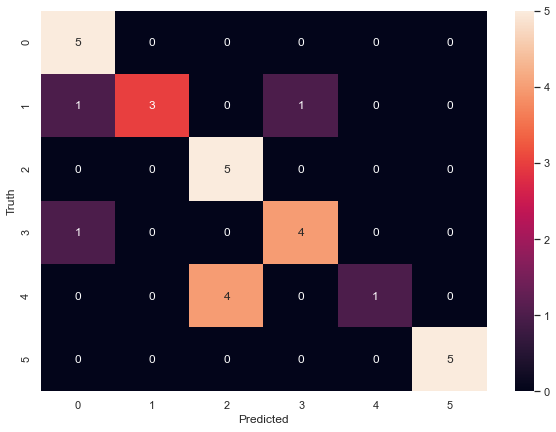

In [140]:
#Confusion Matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
#Evaluating the model based on score and accuracy
score = model.evaluate(X_test, y_test, verbose=1)


#print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1/1 [==============================] - 0s 9ms/step - loss: 0.8208 - acc: 0.7667
Test Accuracy: 0.7666666507720947


In [12]:
X.shape[1]

12

In [15]:
y.shape[1]

6

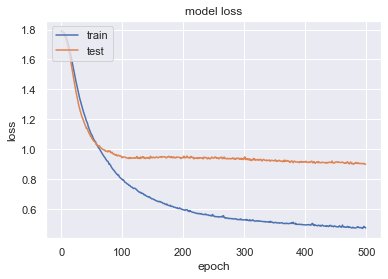

In [45]:
#Graph of loss vs no. of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()